In [57]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [58]:
# Reads in the index list "100 List.csv"
summary = pd.read_csv("100 List.csv")
cols_to_drop = ["Price","Circulating Supply", "Volume (24h)", "% Change (24h)"]
summary.drop(cols_to_drop,inplace=True, axis=1)

In [59]:
# Creates an array of dataframes, top_100_dfs by importing the .csv files
top_100_dfs = []
for i in summary["Name"]:
    file_name = i + ".csv"
    df = pd.read_csv(file_name)
    top_100_dfs.append(df)

In [60]:
# Updates summary to include the age of each currency (on coinmarketcap.com) in the "Age" column
summary["Age"] = None
for idx, df in enumerate(top_100_dfs):
    summary["Age"][idx] = df.shape[0]

/home/nate/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [61]:
bitcoin = top_100_dfs[0]
for idx, row in enumerate(bitcoin):
    bitcoin["Daily Change"] = bitcoin["Close"] - bitcoin["Open"]
    bitcoin["Daily Change %"] = bitcoin["Daily Change"] / bitcoin["Open"]
    bitcoin["Daily Swing"] = bitcoin["High"] - bitcoin["Low"]
    bitcoin["Daily Swing %"] = bitcoin["Daily Swing"] / bitcoin["Open"]
    

In [62]:
bitcoin.max()

Date              Sep 30, 2016
Open                   4901.42
High                   4975.04
Low                    4678.53
Close                  4892.01
Volume             994,625,000
Market Cap         909,526,000
Daily Change            547.71
Daily Change %        0.416811
Daily Swing             786.83
Daily Swing %         0.490656
dtype: object

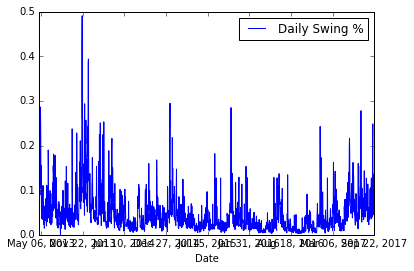

In [63]:
#graph of Bitcoin's volatility over time
BTC_volatility = bitcoin.plot(x="Date",y="Daily Swing %")
BTC_volatility.invert_xaxis()
BTC_volatility.figure

In [80]:
for currency in top_100_dfs:
    for idx, row in enumerate(currency):
        currency["Daily Change"] = None
        currency["Daily Change %"] = None
        currency["Daily Swing"] = None
        currency["Daily Swing %"] = None
        currency["Daily Change"] = currency["Close"] - currency["Open"]
        currency["Daily Change %"] = currency["Daily Change"] / currency["Open"]
        currency["Daily Swing"] = currency["High"] - currency["Low"]
        currency["Daily Swing %"] = currency["Daily Swing"] / currency["Open"]

KeyError: 'Close'

In [82]:
#Mooncoin at index 76 throws an error [suspected from the Close column]

#Haha fuck - it definitely downloaded the CSV early from Google Sheets, gotta update on Kaggle.
top_100_dfs[76]

,Loading...,Daily Change,Daily Change %,Daily Swing,Daily Swing %
